In [47]:
import pandas as pd

In [57]:


data=pd.read_csv('Tucker_transcripts_2.10.23.tsv',sep='\t').drop(columns = ['Unnamed: 0'])

In [58]:
data


,url,timestamp,title,text
0,https://www.foxnews.com/opinion/tucker-carlson...,"February 9, 2023 10:19pm EST",TUCKER CARLSON: Self-defense is becoming illeg...,WARNING: Graphic footage—Fox News host Tucker ...
1,https://www.foxnews.com/opinion/tucker-carlson...,"February 8, 2023 10:25pm EST",TUCKER CARLSON: The lies 'just kept coming' du...,Fox News host Tucker Carlson reacts to Presid...
2,https://www.foxnews.com/opinion/tucker-carlson...,"February 7, 2023 10:51pm EST",TUCKER CARLSON: America's problems are fixable...,Fox News host Tucker Carlson breaks down the t...
3,https://www.foxnews.com/opinion/tucker-carlson...,"February 6, 2023 9:33pm EST",TUCKER CARLSON: The people who owe you the tru...,Fox News host Tucker Carlson calls out the Bid...
4,https://www.foxnews.com/opinion/tucker-carlson...,"February 3, 2023 9:59pm EST",TUCKER CARLSON: Biden administration's stance ...,Fox News host Tucker Carlson takes on the Bid...
...,...,...,...,...
642,https://www.foxnews.com/opinion/tucker-carlson...,"November 19, 2019 1:30pm EST","Tucker Carlson: Media, federal government toug...",Stone found guilty on all seven counts; Epstei...
643,https://www.foxnews.com/opinion/tucker-carlson...,"November 15, 2019 1:09pm EST",Tucker Carlson: Trump impeachment inquiry will...,Media goes into overdrive on impeachment heari...
644,https://www.foxnews.com/opinion/tucker-carlson...,"November 14, 2019 9:24am EST",Tucker Carlson: It's never been clear what Dem...,First public impeachment hearings take place.I...
645,https://www.foxnews.com/opinion/tucker-carlson...,"November 13, 2019 10:13am EST",Tucker Carlson: The end of free speech – What ...,Liberals working to crack down on the First Am...


In [59]:
# Load the regular expression library
import re
# Remove punctuation
data['text_processed'] = \
data['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data['text_processed'] = \
data['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data['text_processed'].head()

0    warning: graphic footage—fox news host tucker ...
1     fox news host tucker carlson reacts to presid...
2    fox news host tucker carlson breaks down the t...
3    fox news host tucker carlson calls out the bid...
4     fox news host tucker carlson takes on the bid...
Name: text_processed, dtype: object

In [51]:
#pip install WordCloud

In [52]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
#long_string = ','.join(list(papers['text_processed'].values))
l = []
for index in data.index:
    #print(index)
    
    long_string = data['text_processed'][index]

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # add wordcloud image to 'l' list    
    l.append(wordcloud.to_image())

In [53]:
#make new column in data df off of 'l' list 
data['img'] = l

In [61]:
#if you index any image cell it will display the image

#data['img'][201]

Messing around with Genism and NLTK:

In [9]:
#pip install gensim
#pip install nltk

In [10]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
papers = data

In [101]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'tucker', 'carlson', 'fox', 'news', 'channel', 'host', 'evening', 'welcome', 'tonight','like','kind','people','know','knew','knowing','tonight',
                   'go','goes','going', 'went','tell','told','telling','say','said','saying','talk','talked','talking','year','think','thinking','thought','happen','happening', 
                   'happened','thing','time','right', 'country', 'countries','america', 'american', 'want','state','work','working','worked','point','call','calling', 'called', 'actual', 
                   'actually','year','live','living'])

stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stop_words and len(token) > 3:

            result.append(lemmatize_stemming(token))
            
    return result

In [102]:
'''
Preview a document after preprocessing
'''
document_num = 50
doc_sample = 'This disk has failed many times. I would like to get it replaced right.'

print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['This', 'disk', 'has', 'failed', 'many', 'times.', 'I', 'would', 'like', 'to', 'get', 'it', 'replaced', 'right.']


Tokenized and lemmatized document: 
['disk', 'fail', 'time', 'replac']


In [103]:
# ep1 =  papers['text_processed'][0]
# ep1_preprocessed = preprocess(ep1)
# #ep1_preprocessed

In [104]:
processed_docs = []

for transcript in papers.text_processed:
    processed_docs.append(preprocess(transcript))

In [105]:
'''
Preview 'processed_docs'
'''
print(processed_docs[2])
print(len(processed_docs))


['break', 'true', 'presid', 'biden', 'imagin', 'biden', 'requir', 'union', 'address', 'constitut', 'biden', 'brass', 'stand', 'televis', 'claim', 'better', 'take', 'littl', 'hour', 'true', 'true', 'divid', 'self', 'confid', 'confus', 'sadder', 'memori', 'generat', 'face', 'risk', 'world', 'problem', 'fixabl', 'profound', 'requir', 'attent', 'wise', 'leader', 'love', 'will', 'elect', 'instead', 'unfortun', 'biden', 'kamala', 'harri', 'cast', 'mediocr', 'stand', 'make', 'decis', 'guess', 'guess', 'biden', 'speech', 'opportun', 'brag', 'victori', 'blame', 'failur', 'januari', 'vladimir', 'putin', 'expect', 'singl', 'honest', 'word', 'hope', 'surpris', 'expect', 'meantim', 'close', 'statist', 'analysi', 'union', 'bidensinc', 'predecessor', 'donald', 'trump', 'give', 'final', 'address', 'joint', 'session', 'congress', 'cost', 'food', 'stapl', 'unit', 'state', 'pretti', 'good', 'measur', 'rise', 'price', 'gasolin', 'go', 'diesel', 'higher', 'consum', 'confid', 'mirror', 'imag', 'drop', 'rise

In [106]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [107]:

'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
         break

0 acceler
1 accord
2 acknowledg
3 activist
4 afraid
5 alan
6 alba
7 alien
8 allow
9 alterc
10 american


In [108]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [109]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 200
bow_doc_x = bow_corpus[document_num]

# for i in range(len(bow_doc_x)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
#                                                      dictionary[bow_doc_x[i][0]], 
#                                                      bow_doc_x[i][1]))

In [119]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=40, workers=2)

In [120]:
'''For each topic, we will explore the words occuring in that topic and its relative weight'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.025*"vaccin" + 0.015*"covid" + 0.012*"mask" + 0.010*"fauci" + 0.007*"question" + 0.007*"health" + 0.006*"scienc" + 0.006*"public" + 0.006*"wear" + 0.005*"biden"


Topic: 1 
Words: 0.013*"virus" + 0.010*"wuhan" + 0.009*"china" + 0.009*"coronavirus" + 0.007*"chines" + 0.007*"come" + 0.005*"world" + 0.005*"govern" + 0.004*"time" + 0.004*"question"


Topic: 2 
Words: 0.014*"biden" + 0.007*"china" + 0.006*"chines" + 0.006*"democrat" + 0.005*"inflat" + 0.005*"govern" + 0.005*"price" + 0.005*"energi" + 0.004*"economi" + 0.004*"problem"


Topic: 3 
Words: 0.020*"ukrain" + 0.013*"russia" + 0.013*"biden" + 0.011*"putin" + 0.009*"russian" + 0.008*"state" + 0.008*"unit" + 0.006*"presid" + 0.005*"militari" + 0.005*"world"


Topic: 4 
Words: 0.032*"twitter" + 0.016*"musk" + 0.012*"speech" + 0.012*"elon" + 0.011*"free" + 0.010*"censorship" + 0.007*"compani" + 0.006*"power" + 0.006*"media" + 0.005*"censor"


Topic: 5 
Words: 0.035*"biden" + 0.013*"trump" + 0.010*"presid" + 0.008*"hu

In [121]:
#lda_model.save("LDA_647_20top_100pass")
#lda_model.save("LDA_647_10top_150pass")
lda_model.save("LDA_647_10top_40pass")

In [23]:
# import gensim
# from gensim.utils import simple_preprocess
# import nltk
# #nltk.download('stopwords')
# #from nltk.corpus import stopwords
# #stop_words = stopwords.words('english')
# #stop_words.extend(['from', 'tucker', 'carlson', 'fox', 'news', 'channel', 'host', 'evening', 'welcome', 'tonight'])
# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]


# data = papers.text_processed.values.tolist()
# print(data)
# data_words = list(sent_to_words(data))
# # remove stop words
# data_words = remove_stopwords(data_words)
# print(data_words) #[:1][0][:30])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



NameError: name 'stop_words' is not defined

In [56]:
#parameters: original len 320 dataset
#lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=40, workers=2)

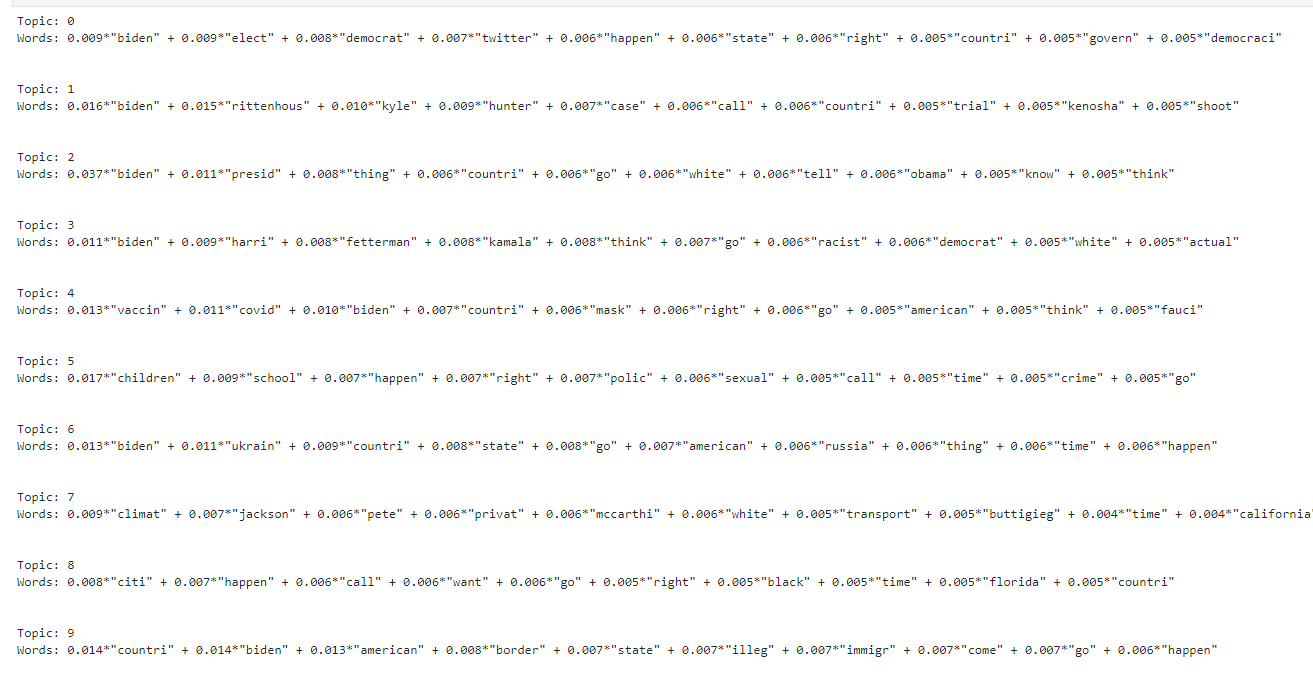

In [ ]:
#parameters: new 647 dataset
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=40, workers=2)

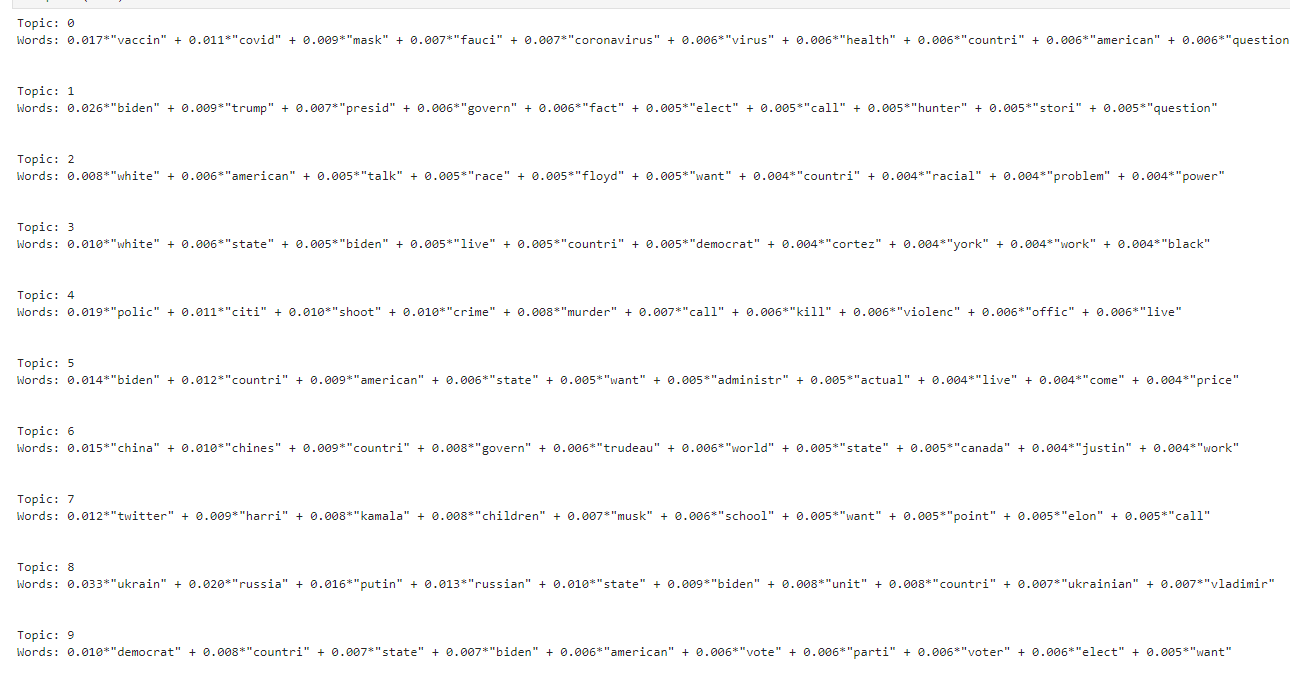

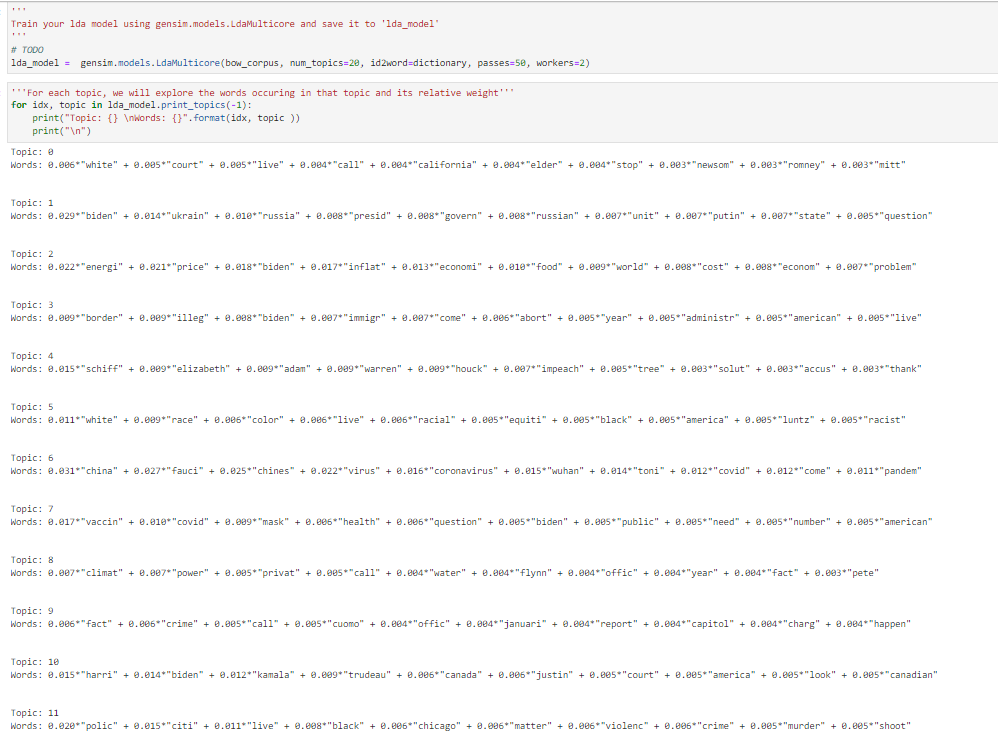

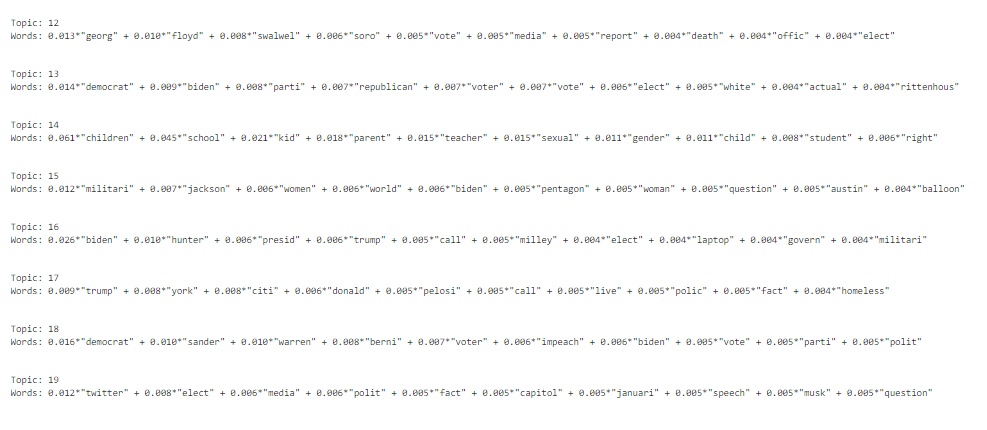

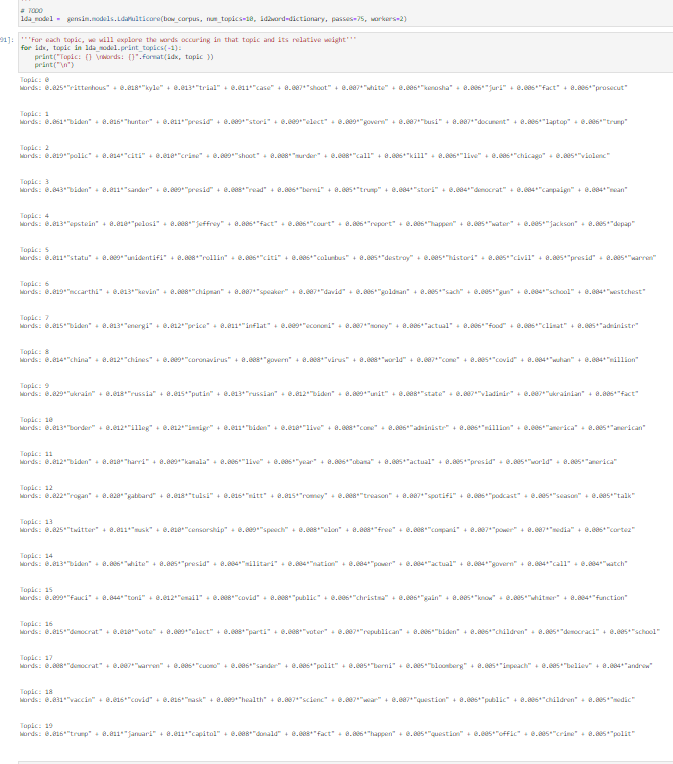

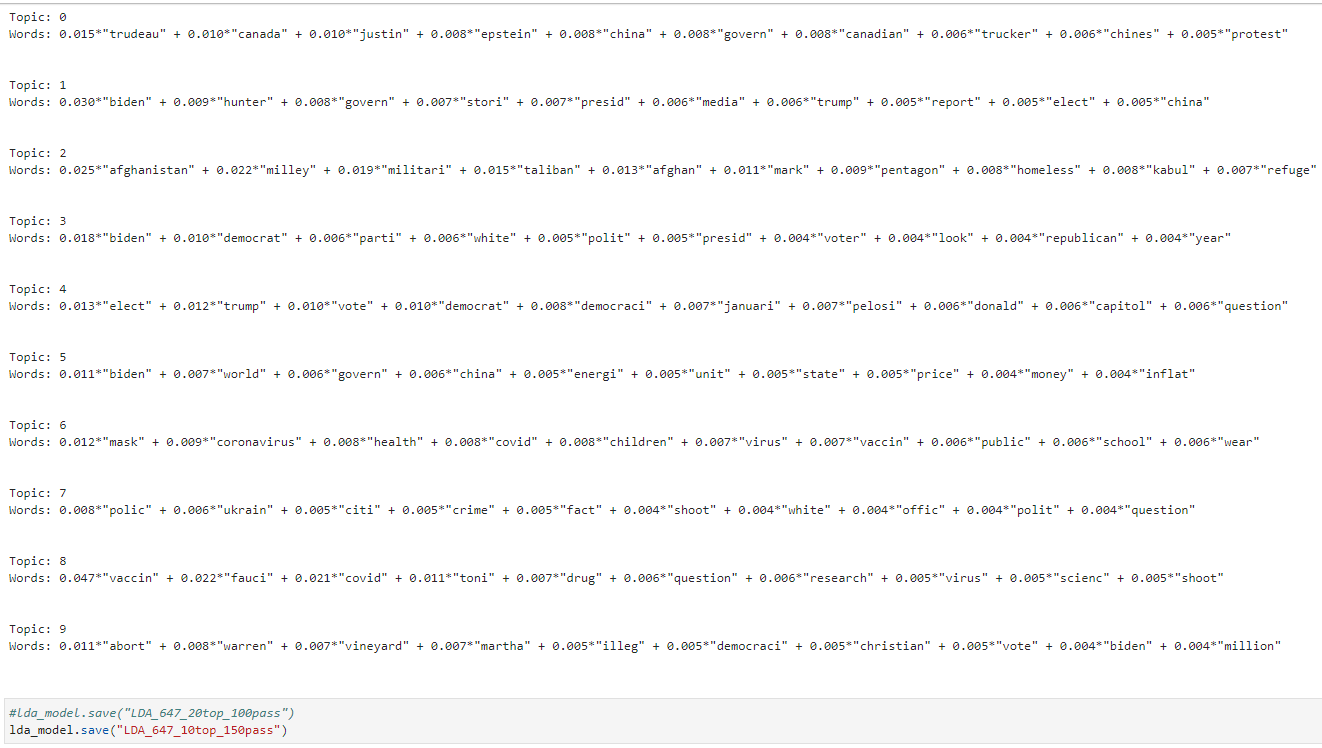